In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
data = yf.download('META', start='2020-01-01', end='2023-12-07')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000


In [ ]:
data = data['Adj Close']

In [ ]:
data

Date
2020-01-02    209.779999
2020-01-03    208.669998
2020-01-06    212.600006
2020-01-07    213.059998
2020-01-08    215.220001
                 ...    
2023-11-30    327.149994
2023-12-01    324.820007
2023-12-04    320.019989
2023-12-05    318.290009
2023-12-06    317.450012
Name: Adj Close, Length: 990, dtype: float64

<Axes: xlabel='Date'>

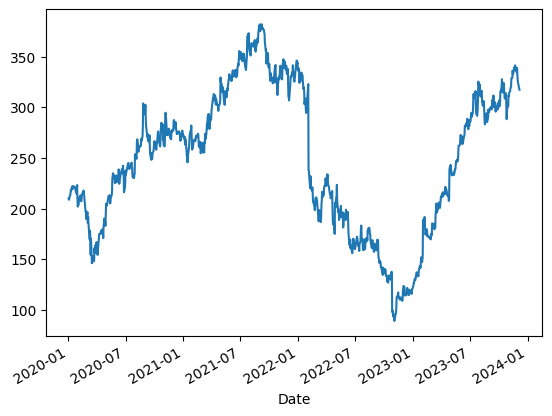

In [ ]:
data.plot()

In [ ]:
data.describe()

count    990.000000
mean     247.838475
std       70.531887
min       88.910004
25%      191.827496
50%      256.830002
75%      306.834999
max      382.179993
Name: Adj Close, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

(array([ 36.,  57., 100., 107., 136.,  95., 144., 137., 132.,  46.]),
 array([ 88.91000366, 118.23700256, 147.56400146, 176.89100037,
        206.21799927, 235.54499817, 264.87199707, 294.19899597,
        323.52599487, 352.85299377, 382.17999268]),
 <BarContainer object of 10 artists>)

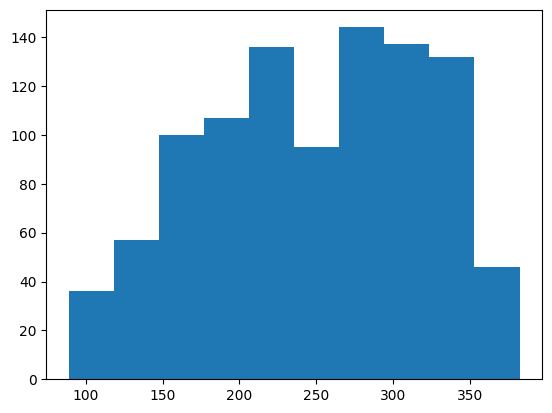

In [ ]:
plt.hist(data)

In [ ]:
data = data.to_frame()

In [ ]:
data['7_dayMA'] = data['Adj Close'].rolling(window=7).mean()

In [ ]:
data.head(20)

,Adj Close,7_dayMA
Date,,
2020-01-02,209.779999,NaN
2020-01-03,208.669998,NaN
2020-01-06,212.600006,NaN
2020-01-07,213.059998,NaN
2020-01-08,215.220001,NaN
2020-01-09,218.300003,NaN
2020-01-10,218.059998,213.670000
2020-01-13,221.910004,215.402858
2020-01-14,219.059998,216.887144


<Axes: xlabel='Date'>

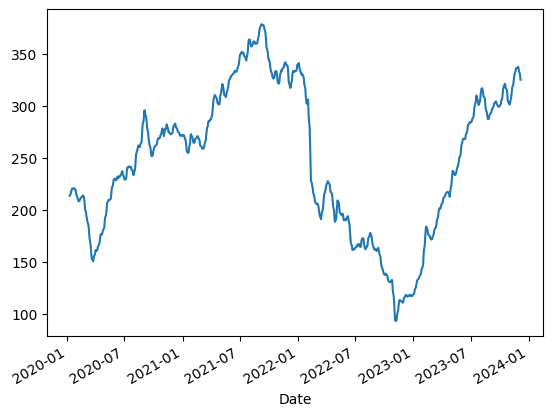

In [ ]:
data['7_dayMA'].plot()

In [ ]:
data['30_dayMA'] = data['Adj Close'].rolling(window=30).mean()

<Axes: xlabel='Date'>

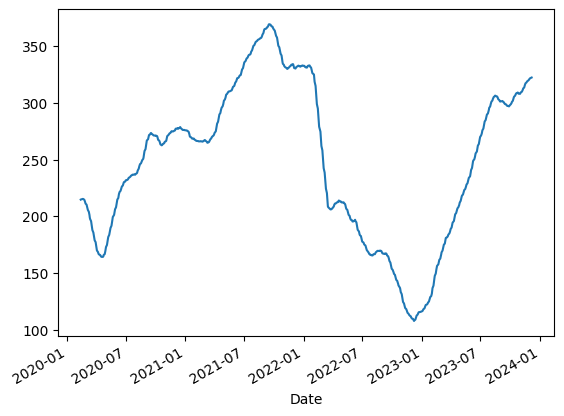

In [ ]:
data['30_dayMA'].plot()

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data

,Adj Close,7_dayMA,30_dayMA
Date,,,
2020-01-02,209.779999,NaN,NaN
2020-01-03,208.669998,NaN,NaN
2020-01-06,212.600006,NaN,NaN
2020-01-07,213.059998,NaN,NaN
2020-01-08,215.220001,NaN,NaN
...,...,...,...
2023-11-30,327.149994,335.677146,321.158333
2023-12-01,324.820007,333.940002,321.558667
2023-12-04,320.019989,330.872859,321.937667


In [ ]:
seasonal_df = data.pivot_table(values='Adj Close', aggfunc='mean',
                               index=data.index.month, columns=data.index.year)

<Axes: xlabel='Date'>

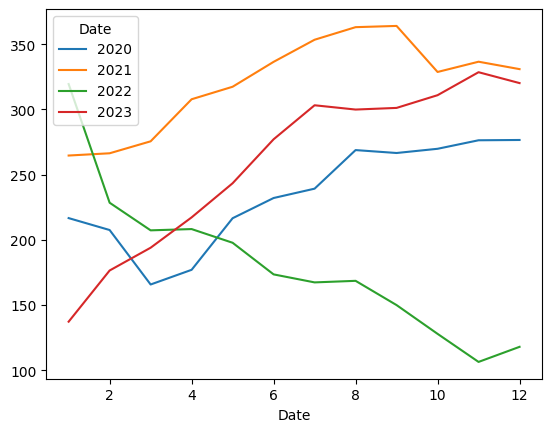

In [ ]:
seasonal_df.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 7)'>

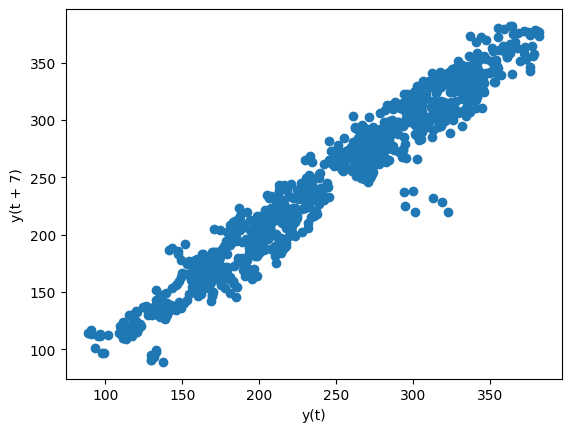

In [ ]:
pd.plotting.lag_plot(data['Adj Close'], lag=7)

In [ ]:
data['7_day_lag'] = data['Adj Close'].shift(7)

In [ ]:
data.head(20)

,Adj Close,7_dayMA,30_dayMA,7_day_lag
Date,,,,
2020-01-02,209.779999,NaN,NaN,NaN
2020-01-03,208.669998,NaN,NaN,NaN
2020-01-06,212.600006,NaN,NaN,NaN
2020-01-07,213.059998,NaN,NaN,NaN
2020-01-08,215.220001,NaN,NaN,NaN
2020-01-09,218.300003,NaN,NaN,NaN
2020-01-10,218.059998,213.670000,NaN,NaN
2020-01-13,221.910004,215.402858,NaN,209.779999
2020-01-14,219.059998,216.887144,NaN,208.669998


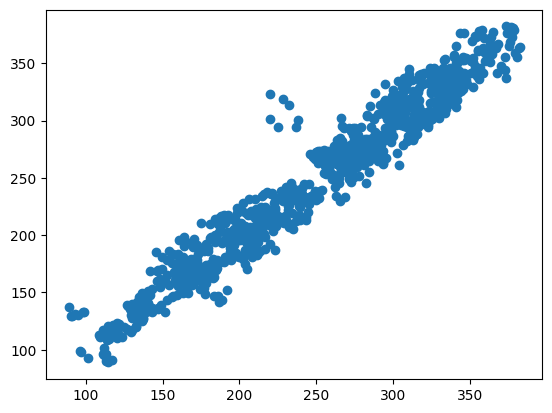

In [ ]:
plt.scatter(data['Adj Close'], data['7_day_lag'])

<Axes: xlabel='y(t)', ylabel='y(t + 120)'>

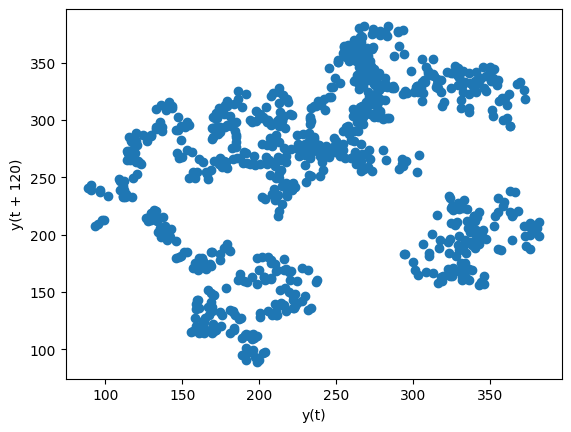

In [ ]:
pd.plotting.lag_plot(data['Adj Close'], lag=120)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

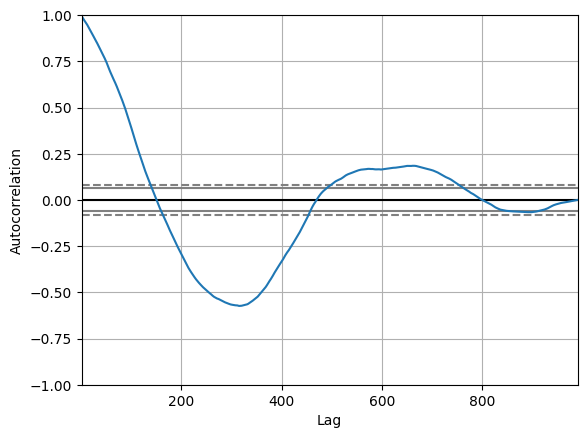

In [ ]:
pd.plotting.autocorrelation_plot(data['Adj Close'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
decomposed = seasonal_decompose(data['Adj Close'], model = 'additive', period=365)

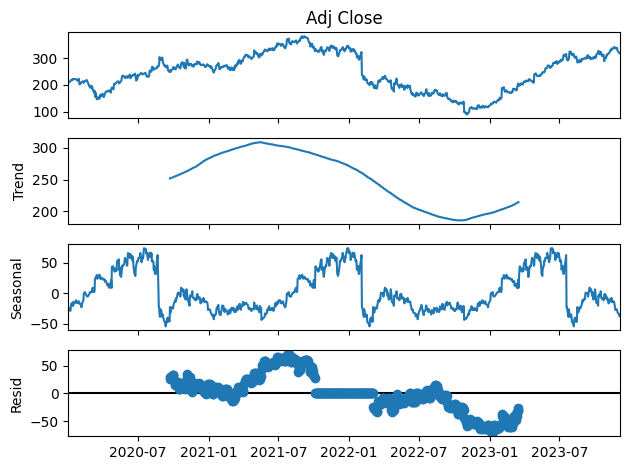

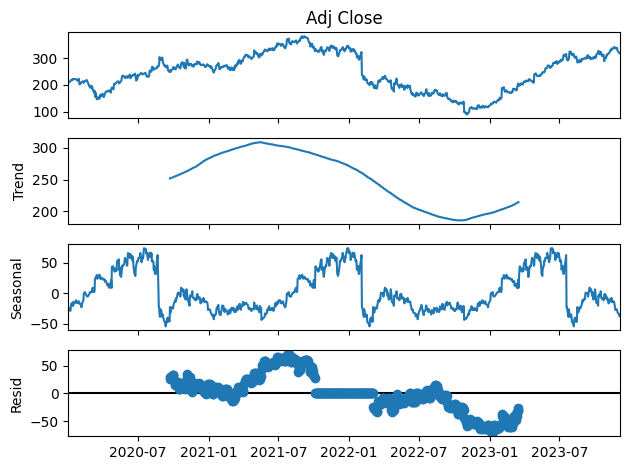

In [ ]:
decomposed.plot()

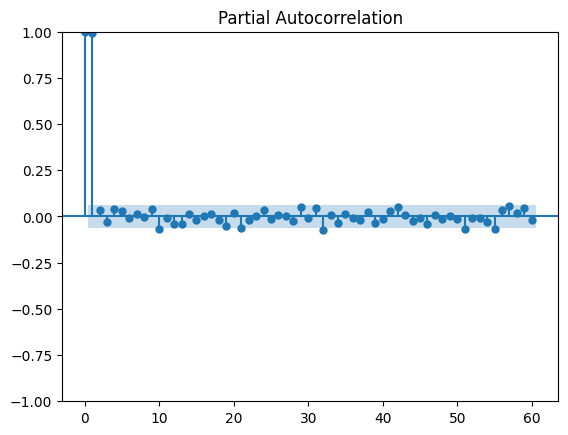

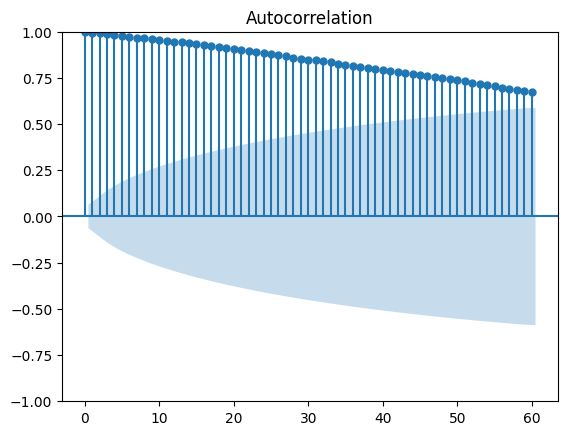

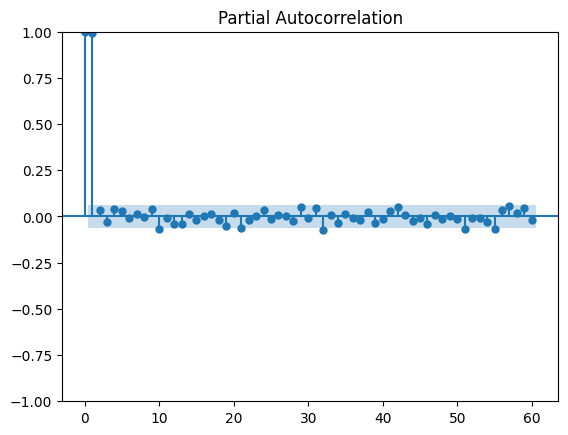

In [ ]:
plot_acf(data['Adj Close'], lags=60)
plot_pacf(data['Adj Close'], lags=60)

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00


In [ ]:
data['Adj Close']

Date
2020-02-14    214.179993
2020-02-18    217.800003
2020-02-19    217.490005
2020-02-20    214.580002
2020-02-21    210.179993
                 ...    
2023-11-30    327.149994
2023-12-01    324.820007
2023-12-04    320.019989
2023-12-05    318.290009
2023-12-06    317.450012
Name: Adj Close, Length: 960, dtype: float64

In [ ]:
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
arima_model = auto_arima(data['Adj Close']
                         , start_p=1
                         , start_q=1
                         , d=0
                         , test='adf'
                         , trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6386.344, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10921.736, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9722.262, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13394.698, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6385.651, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6386.954, Time=0.47 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=8846.395, Time=0.72 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6387.960, Time=0.85 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6388.582, Time=0.22 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 4.542 seconds


In [ ]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  960
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -3188.826
Date:                Fri, 08 Dec 2023   AIC                           6385.651
Time:                        22:22:48   BIC                           6405.119
Sample:                             0   HQIC                          6393.065
                                - 960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1270      0.841      1.339      0.180      -0.522       2.776
ar.L1          0.9956      0.003    310.261      0.000       0.989       1.002
ma.L1         -0.0383      0.036     -1.060      0.2

Interpretaation of the above: The final model fitted was a seasonal ARIMA (1,0,1) estimator, where the p, d, and q parameters were 1, 0, and 1 respectively. The auto_arima tests multiple combinations of p,d,q which is why we see the iteration. We can see the AIC values for each. AIC is an information criterion (Akaike Information Criterion), and it indicates how much information is lost by the model. It hsould be as low as possible.

Now wee can make predictions below.

In [ ]:
arima_model.predict(n_periods=10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


960    317.193922
961    316.915261
962    316.637835
963    316.361638
964    316.086665
965    315.812911
966    315.540370
967    315.269037
968    314.998906
969    314.729972
dtype: float64

Let's try the arima and random forest models on the train data.

In [ ]:
data['30_day_lag'] = data['Adj Close'].shift(30)

In [ ]:
data = data[['Adj Close','7_day_lag','30_day_lag']].dropna()

In [ ]:
Y = data['Adj Close']
X = data[['7_day_lag','30_day_lag']]

In [ ]:
len(X)

960

In [ ]:
x_train,x_test = X.iloc[:800], X.iloc[800:]
y_train, y_test= Y.iloc[:800], Y.iloc[800:]

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
pred = rf_model.predict(x_test)

In [ ]:
import numpy as np
np.sqrt(mean_squared_error(pred,y_test))

18.268557141671426

In [ ]:
arima_model_2 = auto_arima(y_train
                         , start_p=1
                         , start_q=1
                         , d=0
                         , test='adf'
                         , trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5367.804, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9160.070, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8161.986, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11115.531, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5367.154, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5368.544, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=7428.682, Time=0.98 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5369.504, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5369.795, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 5.309 seconds


In [ ]:
predicted_values_arima = arima_model_2.predict(len(y_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
np.sqrt(mean_squared_error(predicted_values_arima,y_test))

76.82847893502377

We can see that the RF model performed way better with 7 and 30 day lag.